# 0. Import dependencies

In [1]:
import torch
import sklearn
import numpy as np


In [2]:
from sklearn.datasets import make_classification
torch.manual_seed(123)


# 1. Working with datasets

## 1.1 Creating the datasets
Creating a toy dataset with `sklearn.make_classification()`.

In [3]:
# Make a Toy Dataset
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2)

# Change it into the Tensor
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)


In [4]:
print(f'X: {X.ndim} dim(s)\n', 'Shape of X: ', np.shape(X), '\n', X, sep='')

X: 2 dim(s)
Shape of X: torch.Size([1000, 4])
tensor([[ 1.1470,  0.2503, -1.6514,  2.1528],
        [ 0.9797, -0.6190, -1.3286,  0.8500],
        [ 0.9458, -1.3951, -1.2042, -0.1263],
        ...,
        [ 0.8941, -0.4945, -1.2194,  0.8594],
        [ 0.3334,  0.4408, -0.5161,  1.0626],
        [-0.7762,  0.5215,  1.0496, -0.6365]])


In [5]:
print(f'y: {y.ndim} dim(s)\n', 'Shape of y: ', np.shape(y), '\n', y, sep='')

y: 1 dim(s)
Shape of y: torch.Size([1000])
tensor([1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0.,
        0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
        0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1.,
        1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
        0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
        1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1.,
        1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
        1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
        0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
        0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1

## 1.2 Shuffling the datasets
Shuffling using the `torch.randperm()` function. Learn more about this function [here](https://pytorch.org/docs/stable/generated/torch.randperm.html).

Here, the first argument needs to be the size `n` in `int`. The `y.size()` simply won't work since the `torch.Tensor.size()` function returns the size as an object. We pass in the first dimension (0th) to retrieve size of the first dim in `int`. Values other than 0 won't work since this tensor only has one dim. 

In [6]:
# Shuffling data
torch.manual_seed(10)

# Creating a shuffled dataset ranging from 0 to n - 1 (999)
shuffledData = torch.randperm(y.size(0), dtype=torch.long)

# Printing a sample from our shuffled data
print(f'Sampled shuffled data:\n\n{shuffledData[:10]}')


Sampled shuffled data:

tensor([937, 859, 548, 487, 148, 190, 199, 632,  33, 714])


In [7]:
print(f'Shuffled generated data:\n\n{shuffledData}')

Shuffled generated data:

tensor([937, 859, 548, 487, 148, 190, 199, 632,  33, 714, 726, 238, 593, 108,
        226, 353, 680, 292, 312, 204, 428, 317, 164, 615, 679, 159, 886, 210,
        647, 603, 774, 360,  40, 173, 672, 744, 383, 824, 485, 811, 437, 386,
        917, 310, 977, 636, 478, 869, 358, 743, 216, 735,  99, 770, 690, 101,
        874, 509, 967, 303, 739, 273, 440, 115, 876, 104, 370, 394, 907, 182,
        402, 612, 207, 215, 469, 961,  94, 979, 459, 806, 609, 375,  66, 638,
        980,  50, 781, 135, 831, 357,  27, 451, 408, 355, 398, 367, 623, 930,
        498, 189, 585, 549, 678, 796, 978, 648, 673, 955,  45, 987, 954, 959,
        414, 643, 711, 731, 692, 950, 838, 206, 785, 244, 423,  37, 633, 875,
        291, 776, 333,  18, 936, 846, 171, 213, 730, 547, 666, 178, 488, 365,
        323, 445, 481, 535, 933, 657, 998, 832, 422, 768, 778, 343, 913, 337,
        863, 803, 121, 286, 250, 176, 305, 167, 684, 139, 299, 887, 943,  85,
        988, 667,  48, 762, 646, 510, 

We've created a list of indices that are sorted. Now mapping the shuffled indices to create a shuffled dataset.

In [8]:
X, y = X[shuffledData], y[shuffledData]

In [9]:
print(f'Shuffled X:\n\n{X}')

Shuffled X:

tensor([[ 1.3223, -0.5418, -1.8220,  1.4958],
        [-0.4106,  0.8503,  0.4987,  0.3454],
        [ 0.2019,  0.3583, -0.3215,  0.7519],
        ...,
        [-2.6490,  1.5368,  3.6059, -2.4608],
        [ 0.3964,  0.3893, -0.6004,  1.1034],
        [ 0.7709,  0.3504, -1.1277,  1.6631]])


In [10]:
print(f'Shuffled y:\n\n{y}')

Shuffled y:

tensor([0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0.,
        1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0.,
        1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
        1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.,
        1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
        1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
        0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0.,
        0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
        0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1.,
        0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
        1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
        0., 0., 1., 1., 1.,

## 1.3 Splitting the dataset into training and testing data

### 1.3.1 Shuffling data

In [11]:
# Train Test split
shuffledTrainDataMakeup = int(shuffledData.size(0) * 0.7)

shuffledTrainData = shuffledData[:shuffledTrainDataMakeup]
shuffledTestData = shuffledData[shuffledTrainDataMakeup:]


How much does the training data make up of the actual dataset.

In [12]:
print(f'Training data makeup: {shuffledTrainDataMakeup}\n\n')


Training data makeup: 700




Details of the training data.

In [13]:
print(f'Printing details of training data\n\nShape: {np.shape(shuffledTrainData)}\n\nData:\n{shuffledTrainData}')


Printing details of training data

Shape: torch.Size([700])

Data:
tensor([937, 859, 548, 487, 148, 190, 199, 632,  33, 714, 726, 238, 593, 108,
        226, 353, 680, 292, 312, 204, 428, 317, 164, 615, 679, 159, 886, 210,
        647, 603, 774, 360,  40, 173, 672, 744, 383, 824, 485, 811, 437, 386,
        917, 310, 977, 636, 478, 869, 358, 743, 216, 735,  99, 770, 690, 101,
        874, 509, 967, 303, 739, 273, 440, 115, 876, 104, 370, 394, 907, 182,
        402, 612, 207, 215, 469, 961,  94, 979, 459, 806, 609, 375,  66, 638,
        980,  50, 781, 135, 831, 357,  27, 451, 408, 355, 398, 367, 623, 930,
        498, 189, 585, 549, 678, 796, 978, 648, 673, 955,  45, 987, 954, 959,
        414, 643, 711, 731, 692, 950, 838, 206, 785, 244, 423,  37, 633, 875,
        291, 776, 333,  18, 936, 846, 171, 213, 730, 547, 666, 178, 488, 365,
        323, 445, 481, 535, 933, 657, 998, 832, 422, 768, 778, 343, 913, 337,
        863, 803, 121, 286, 250, 176, 305, 167, 684, 139, 299, 887, 943,  8

Details of the testing data.

In [14]:
print(f'Printing details of testing data\n\nShape: {np.shape(shuffledTestData)}\n\nData:\n{shuffledTestData}')


Printing details of testing data

Shape: torch.Size([300])

Data:
tensor([313, 279, 258, 960, 532, 419,  49, 777, 435, 444, 387,  23,  17, 566,
        862, 637, 728,  34,  19, 274, 331, 760, 508, 149, 893, 563, 596, 991,
        941, 565,   1, 780, 161, 461, 452, 883, 900, 569, 556, 334,  64, 839,
        122, 308, 561, 516, 567,  90, 616, 184, 396, 138, 687, 344, 338, 528,
        554, 868, 504, 976,  91, 113, 536, 490, 527, 804, 605, 854, 424, 235,
         67, 350, 601, 879, 821, 152, 621, 829, 473,  39, 825, 241, 653, 709,
        624, 472,  42, 755,  25, 622, 906, 287, 165, 125, 916, 660, 223, 446,
        691, 947, 878, 546,  68, 328, 911, 515, 434,   3, 203, 787, 181,   7,
        335, 822, 852, 289, 295, 708, 698, 826, 577, 695, 923, 788, 456, 482,
        881, 631, 132,  79, 477, 202, 404,   8, 619, 651, 506, 704, 772, 175,
        696, 985, 501,  26, 884, 511, 591, 222, 234, 194, 426, 540,  36, 608,
        146, 867, 694, 147, 284, 519, 517, 427, 830, 964, 293, 652, 948, 815

In [15]:
X_train, y_train = X[shuffledTrainData], y[shuffledTrainData]
X_test, y_test = X[shuffledTestData], y[shuffledTestData]


Printing details of shuffled training and testing data

In [16]:
X_train.shape


torch.Size([700, 4])

In [17]:
X_train


tensor([[ 0.9129, -0.8299, -1.2131,  0.4915],
        [ 0.3415, -0.6034, -0.4249, -0.1641],
        [-0.3526,  0.4775,  0.4531, -0.0035],
        ...,
        [ 1.7302, -0.9709, -2.3584,  1.6463],
        [ 2.1494, -0.6024, -2.9891,  2.7620],
        [ 1.4940, -1.0824, -2.0124,  1.1318]])

In [18]:
X_test.shape


torch.Size([300, 4])

In [19]:
X_test


tensor([[-1.7481,  1.3058,  2.3508, -1.2776],
        [-0.4939,  1.0740,  0.5949,  0.4761],
        [ 0.7419, -0.4250, -1.0104,  0.6956],
        ...,
        [ 0.3153, -0.9982, -0.3490, -0.6751],
        [ 0.0747, -1.2289,  0.0149, -1.3383],
        [-0.4021,  1.1305,  0.4590,  0.6918]])

## 1.4 Normalising data

In [20]:
mean, std = X_train.mean(dim=0), X_train.std(dim=0)

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std


---

# 2. Building a Neural Network

Importing libraries

In [21]:
import torch.nn as nn
from torch.autograd import grad


Class definition for the neural network

In [22]:
class NN():
    def __init__(self, n_features):
        self.n_features = n_features
        self.weight = torch.zeros(
            size=(n_features, 1), dtype=torch.float, requires_grad=True)
        self.bias = torch.zeros(1, dtype=torch.float, requires_grad=True)

    def forward(self, x):
        output = torch.add(torch.mm(x, self.weight), self.bias)
        return output.view(-1)


Defining our loss function. Looks oddly similar to the mean square error function.

In [23]:
def loss_fn(yHat, y):
    return torch.mean((yHat - y) ** 2)

Function to train the model returning the cost as a list.

In [24]:
def train(model, x, y, n_epoch=10, lr=0.001, seed=23, bsz=50):
    cost = []
    torch.manual_seed(seed)
    
    for i in range(n_epoch):
        shuffledData = torch.randperm(y.size(0))
        batches = torch.split(shuffledData, bsz)

        for idx in batches:
            # 1. Compute the output
            yHat = model.forward(x[idx])

            # 2. Compute the Error
            loss = loss_fn(yHat, y[idx])

            # 3. Compute the gradient
            grad_w = grad(loss, model.weight, retain_graph=True)[0]
            grad_b = grad(loss, model.bias)[0]

            # 4. Update Model Parameters
            model.weight = model.weight - lr * grad_w
            model.bias = model.bias - lr * grad_b

        # 5. Log and print the loss
        with torch.no_grad():
            yHat = model.forward(x)
            curr_loss = loss_fn(yHat, y)
            
            print('Epoch: %3d ' % (i + 1), end="")
            print('| MSE %.5f' % curr_loss)
            
            cost.append(curr_loss)

    return cost


Creating a neural network with 1 feature. Then training that neural net.

In [25]:
model = NN(X_train.size(1))
cost = train(model, X_train, y_train, n_epoch=50)


Epoch:   1 | MSE 0.47112
Epoch:   2 | MSE 0.44754
Epoch:   3 | MSE 0.42605
Epoch:   4 | MSE 0.40644
Epoch:   5 | MSE 0.38848
Epoch:   6 | MSE 0.37202
Epoch:   7 | MSE 0.35686
Epoch:   8 | MSE 0.34287
Epoch:   9 | MSE 0.32994
Epoch:  10 | MSE 0.31795
Epoch:  11 | MSE 0.30681
Epoch:  12 | MSE 0.29646
Epoch:  13 | MSE 0.28680
Epoch:  14 | MSE 0.27778
Epoch:  15 | MSE 0.26935
Epoch:  16 | MSE 0.26145
Epoch:  17 | MSE 0.25406
Epoch:  18 | MSE 0.24712
Epoch:  19 | MSE 0.24061
Epoch:  20 | MSE 0.23448
Epoch:  21 | MSE 0.22872
Epoch:  22 | MSE 0.22329
Epoch:  23 | MSE 0.21819
Epoch:  24 | MSE 0.21337
Epoch:  25 | MSE 0.20883
Epoch:  26 | MSE 0.20455
Epoch:  27 | MSE 0.20051
Epoch:  28 | MSE 0.19670
Epoch:  29 | MSE 0.19309
Epoch:  30 | MSE 0.18969
Epoch:  31 | MSE 0.18647
Epoch:  32 | MSE 0.18344
Epoch:  33 | MSE 0.18057
Epoch:  34 | MSE 0.17785
Epoch:  35 | MSE 0.17528
Epoch:  36 | MSE 0.17285
Epoch:  37 | MSE 0.17056
Epoch:  38 | MSE 0.16838
Epoch:  39 | MSE 0.16633
Epoch:  40 | MSE 0.16438


Plotting the graph relating the epoch and error.

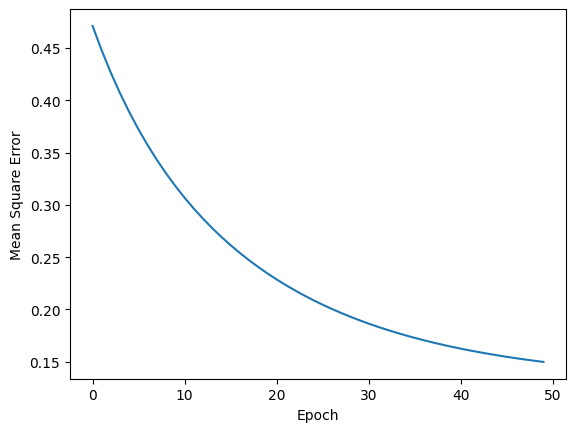

In [26]:
import matplotlib.pyplot as plt

plt.plot(range(len(cost)), cost)

plt.ylabel('Mean Square Error')
plt.xlabel('Epoch')

plt.show()


Calculating the training and testing accuracies.

In [27]:
ones = torch.ones(y_train.size())
zeros = torch.zeros(y_train.size())


In [28]:
train_pred = model.forward(X_train)
train_acc = torch.mean((torch.where(train_pred > 0.5, ones, zeros).int() == y_train).float())

ones = torch.ones(y_test.size())
zeros = torch.zeros(y_test.size())

test_pred = model.forward(X_test)
test_acc = torch.mean((torch.where(test_pred > 0.5, ones, zeros).int() == y_test).float())

print('Training Accuracy: %.2f' % (train_acc * 100))
print('Testing Accuracy: %.2f' % (test_acc * 100))


Training Accuracy: 79.00
Testing Accuracy: 80.67


---

# 3. Model Using Pytorch

In [29]:
import torch
import sklearn
import torch.nn.functional as F


In [30]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [31]:
# Create The dataset
X, y = make_classification(n_samples=1000, n_classes=2, n_features=4)

# Normalize the Data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Array to Tensor
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)


In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=21)
print(X_train.shape)
print(X_test.shape)

torch.Size([700, 4])
torch.Size([300, 4])


In [33]:
class NeuralNetworkPyTorch(nn.Module):
    def __init__(self, n_features):
        super(NeuralNetworkPyTorch, self).__init__()
        self.linear = nn.Linear(n_features, 1)

        self.linear.weight.detach().zero_()
        self.linear.bias.detach().zero_()

    def forward(self, x):
        out = self.linear(x)
        return out.view(-1)


Overloaded function `train()` to train the neural network built using PyTorch.

In [34]:
def train(model, x, y, n_epoch=10, lr=0.001, seed=23, bsz=50):
    cost = []
    torch.manual_seed(seed)
    
    # Optimizer
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    for i in range(n_epoch):
        shuffledData = torch.randperm(y.size(0))
        batches = torch.split(shuffledData, bsz)

        for idx in batches:
            # 1. Compute the Output
            yHat = model.forward(x[idx])

            # 2. Compute the Loss
            loss = torch.nn.functional.mse_loss(yHat, y[idx])

            # 3. Compute the Gradients
            optimizer.zero_grad()
            loss.backward()

            # 4. Update the Model Parameters
            optimizer.step()

            # model.weight=model.weight-lr*grad_w
            # model.bias=model.bias-lr*grad_b

        # 5. Log and print the Loss
        with torch.no_grad():
            yHat = model.forward(x)
            curr_loss = loss_fn(yHat, y)
            print('Epoch: %3d ' % (i + 1), end="")
            print('| MSE % .5f' % curr_loss)
            cost.append(curr_loss)

    return cost


In [35]:
n_feature = X_train.size(1)
model = NeuralNetworkPyTorch(n_features=n_feature)


In [36]:
cost = train(model, X_train, y_train, n_epoch=50)


Epoch:   1 | MSE  0.46761
Epoch:   2 | MSE  0.44104
Epoch:   3 | MSE  0.41708
Epoch:   4 | MSE  0.39536
Epoch:   5 | MSE  0.37565
Epoch:   6 | MSE  0.35770
Epoch:   7 | MSE  0.34130
Epoch:   8 | MSE  0.32630
Epoch:   9 | MSE  0.31250
Epoch:  10 | MSE  0.29982
Epoch:  11 | MSE  0.28810
Epoch:  12 | MSE  0.27729
Epoch:  13 | MSE  0.26727
Epoch:  14 | MSE  0.25797
Epoch:  15 | MSE  0.24932
Epoch:  16 | MSE  0.24128
Epoch:  17 | MSE  0.23378
Epoch:  18 | MSE  0.22678
Epoch:  19 | MSE  0.22023
Epoch:  20 | MSE  0.21411
Epoch:  21 | MSE  0.20837
Epoch:  22 | MSE  0.20298
Epoch:  23 | MSE  0.19793
Epoch:  24 | MSE  0.19320
Epoch:  25 | MSE  0.18874
Epoch:  26 | MSE  0.18455
Epoch:  27 | MSE  0.18061
Epoch:  28 | MSE  0.17690
Epoch:  29 | MSE  0.17341
Epoch:  30 | MSE  0.17011
Epoch:  31 | MSE  0.16701
Epoch:  32 | MSE  0.16409
Epoch:  33 | MSE  0.16133
Epoch:  34 | MSE  0.15873
Epoch:  35 | MSE  0.15628
Epoch:  36 | MSE  0.15397
Epoch:  37 | MSE  0.15178
Epoch:  38 | MSE  0.14972
Epoch:  39 |

[]

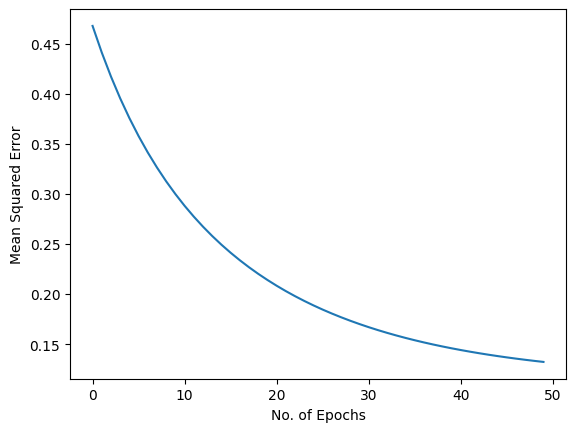

In [37]:
plt.plot(range(len(cost)), cost)
plt.xlabel('No. of Epochs')
plt.ylabel('Mean Squared Error')
plt.plot()


In [38]:
ones = torch.ones(y_train.size(0))
zero = torch.zeros(y_train.size(0))
train_pred = model.forward(X_train)

train_acc = torch.mean(
    (torch.where(train_pred > 0.5, ones, zero).int() == y_train).float())
# print(train_acc)

ones = torch.ones(y_test.size(0))
zero = torch.zeros(y_test.size(0))
test_pred = model.forward(X_test)

test_acc = torch.mean(
    (torch.where(test_pred > 0.5, ones, zero).int() == y_test).float())
print('Training Accuracy : %.2f' % train_acc)
print('Testing Accuracy: %.2f' % test_acc)


Training Accuracy : 0.83
Testing Accuracy: 0.85


---

# 4. Logistic Regression

In [39]:
def train(model, x, y, n_epoch=10, lr=0.001, seed=23, bsz=50):
    cost = []
    torch.manual_seed(seed)
    # Optimizer
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    for i in range(n_epoch):
        shuffledData = torch.randperm(y.size(0))
        batches = torch.split(shuffledData, bsz)

        for idx in batches:
            # 1. Compute the Output
            yHat = model.forward(x[idx])

            # 2. Compute the Loss
            loss = torch.nn.functional.binary_cross_entropy(
                torch.sigmoid(yHat), y[idx])

            # 3. Compute the Gradients
            optimizer.zero_grad()
            loss.backward()

            # 4. Update the Model Parameters
            optimizer.step()

            # model.weight=model.weight-lr*grad_w
            # model.bias=model.bias-lr*grad_b

        # 5. Log and print the Loss
        with torch.no_grad():
            yHat = model.forward(x)
            curr_loss = loss_fn(yHat, y)
            print('Epoch : %3d ' % (i + 1), end="")
            print('| MSE % .5f' % curr_loss)
            cost.append(curr_loss)

    return cost


In [40]:
n_feature = X_train.size(1)
model = NeuralNetworkPyTorch(n_features=n_feature)


In [41]:
cost = train(model, X_train, y_train, n_epoch=50)


Epoch :   1 | MSE  0.48889
Epoch :   2 | MSE  0.48102
Epoch :   3 | MSE  0.47353
Epoch :   4 | MSE  0.46640
Epoch :   5 | MSE  0.45963
Epoch :   6 | MSE  0.45320
Epoch :   7 | MSE  0.44710
Epoch :   8 | MSE  0.44134
Epoch :   9 | MSE  0.43589
Epoch :  10 | MSE  0.43075
Epoch :  11 | MSE  0.42592
Epoch :  12 | MSE  0.42137
Epoch :  13 | MSE  0.41711
Epoch :  14 | MSE  0.41313
Epoch :  15 | MSE  0.40942
Epoch :  16 | MSE  0.40597
Epoch :  17 | MSE  0.40278
Epoch :  18 | MSE  0.39984
Epoch :  19 | MSE  0.39713
Epoch :  20 | MSE  0.39466
Epoch :  21 | MSE  0.39242
Epoch :  22 | MSE  0.39040
Epoch :  23 | MSE  0.38860
Epoch :  24 | MSE  0.38701
Epoch :  25 | MSE  0.38563
Epoch :  26 | MSE  0.38444
Epoch :  27 | MSE  0.38344
Epoch :  28 | MSE  0.38264
Epoch :  29 | MSE  0.38202
Epoch :  30 | MSE  0.38157
Epoch :  31 | MSE  0.38130
Epoch :  32 | MSE  0.38120
Epoch :  33 | MSE  0.38126
Epoch :  34 | MSE  0.38148
Epoch :  35 | MSE  0.38185
Epoch :  36 | MSE  0.38238
Epoch :  37 | MSE  0.38305
E

[]

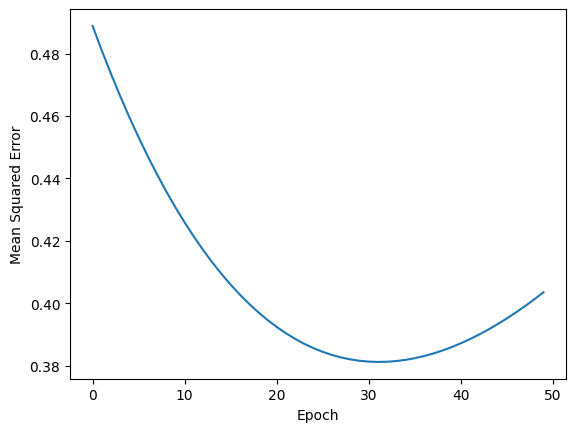

In [42]:
plt.plot(range(len(cost)), cost)
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.plot()


In [43]:
ones = torch.ones(y_train.size(0))
zero = torch.zeros(y_train.size(0))
train_pred = model.forward(X_train)

train_acc = torch.mean(
    (torch.where(train_pred > 0.5, ones, zero).int() == y_train).float())
# print(train_acc)

ones = torch.ones(y_test.size(0))
zero = torch.zeros(y_test.size(0))
test_pred = model.forward(X_test)

test_acc = torch.mean(
    (torch.where(test_pred > 0.5, ones, zero).int() == y_test).float())
print('Training Accuracy : %.2f' % train_acc)
print('Testing Accuracy: %.2f' % test_acc)


Training Accuracy : 0.63
Testing Accuracy: 0.61
